### Stack Overflow Survey - Multiple Years

- Download the last five years of Stack Overflow Survey data, 2016-2020, from [here](https://insights.stackoverflow.com/survey);
- Checkout defferent types of headers;
- Unify headers for columns of interest;
- Export raw data with unified header as csv;

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)

from IPython import display
%matplotlib inline

### Data wrangling

#### Gather the data

In [2]:
PATH_IN = "data_in"
PATH_OUT = "data_out"

filename = "survey_results_public.csv"

In [3]:
# check out all the data avalable
for dirname in os.listdir(PATH_IN):
    print(os.path.join(PATH_IN, dirname, filename))

data_in\2011\survey_results_public.csv
data_in\2012\survey_results_public.csv
data_in\2013\survey_results_public.csv
data_in\2014\survey_results_public.csv
data_in\2015\survey_results_public.csv
data_in\2016\survey_results_public.csv
data_in\2017\survey_results_public.csv
data_in\2018\survey_results_public.csv
data_in\2019\survey_results_public.csv
data_in\2020\survey_results_public.csv


In [4]:
def load_df(year):
    '''
    INPUT
        year - the year we want to load the data survey for
    OUTPUT
        df - survey data for that year
    '''
    
    df = pd.read_csv(os.path.join(PATH_IN, year, filename), 
                      usecols=list(headers[f'header_{year}'].keys()), 
                      dtype=headers[f'header_{year}'],
                      encoding = "ISO-8859-1",
                      low_memory=False)
    df['year'] = year
    df.rename(columns=headers[f'map_header_{year}'], inplace=True)
    return df

#### Assess the data

### Unify headers

Define ```headers``` dictionary for years of interest:
- first, we need the column name from the file
- second, we need to map the header with a common name for the final dataframe

In [5]:
# headers dictionary
headers = {'header_2020' : {#'Age': np.float, 
                           'ConvertedComp': np.float,
                           'YearsCode': str,
                           'Country': str,
                           'JobSat': str, 
                           'LanguageWorkedWith': str
                           },
           'map_header_2020':{#'Age': np.float, 
                           'ConvertedComp': 'salary',
                           'YearsCode': 'coding_experience',
                           'Country': 'country',
                           'JobSat': 'job_satisfaction', 
                           'LanguageWorkedWith': 'programming_lg'
                           },
           
           'header_2019' : {#'Age': np.float, 
                           'ConvertedComp': np.float,
                           'YearsCode': str,
                           'Country': str,
                           'JobSat': str, 
                           'LanguageWorkedWith': str
                           },
           'map_header_2019':{#'Age': np.float, 
                           'ConvertedComp': 'salary',
                           'YearsCode': 'coding_experience',
                           'Country': 'country',
                           'JobSat': 'job_satisfaction', 
                           'LanguageWorkedWith': 'programming_lg'
                           },
            'header_2018' : {#'Age': str, 
                           'Salary': str,
                           'Country': str,
                           'JobSatisfaction': str, 
                           'YearsCoding': str,
                           'LanguageWorkedWith': str
                           },
            'map_header_2018' : {#'Age': str, 
                           'Salary': 'salary',
                           'Country': 'country',
                           'JobSatisfaction': 'job_satisfaction', 
                           'YearsCoding': 'coding_experience',
                           'LanguageWorkedWith': 'programming_lg'
                           },
            'header_2017' : {'Salary': str,
                           'Country': str,
                           'JobSatisfaction': str, 
                           'YearsProgram': str,
                           'HaveWorkedLanguage': str
                           },
           'map_header_2017' : {'Salary': 'salary',
                           'Country': 'country',
                           'JobSatisfaction': 'job_satisfaction', 
                           'YearsProgram': 'coding_experience',
                           'HaveWorkedLanguage': 'programming_lg'
                           },
            'header_2016' : {#'age_range': str,
                           'salary_midpoint': str,
                           'country': str,
                           'job_satisfaction': str, 
                           'experience_range': str,
                           'tech_do': str
                           },
           'map_header_2016' : {'salary_midpoint': 'salary',
                           'country': 'country',
                           'job_satisfaction': 'job_satisfaction', 
                           'experience_range': 'coding_experience',
                           'tech_do': 'programming_lg'
                           },
          }

In [6]:
# load dataframe for 2020
df_2020 = load_df('2020')
# load dataframe for 2019
df_2019 = load_df('2019')
# load dataframe for 2018
df_2018 = load_df('2018')
# load dataframe for 2017
df_2017 = load_df('2017')
# load dataframe for 2016
df_2016 = load_df('2016')

### A look at the data

In [7]:
# check out the columns for 2020
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 6 columns):
salary               34756 non-null float64
country              64072 non-null object
job_satisfaction     45194 non-null object
programming_lg       57378 non-null object
coding_experience    57684 non-null object
year                 64461 non-null object
dtypes: float64(1), object(5)
memory usage: 3.0+ MB


In [8]:
# check out the columns for 2019
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 6 columns):
country              88751 non-null object
coding_experience    87938 non-null object
job_satisfaction     70988 non-null object
salary               55823 non-null float64
programming_lg       87569 non-null object
year                 88883 non-null object
dtypes: float64(1), object(5)
memory usage: 4.1+ MB


In [9]:
# check out the columns for 2018
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Data columns (total 6 columns):
country              98443 non-null object
coding_experience    93835 non-null object
job_satisfaction     69276 non-null object
salary               50578 non-null object
programming_lg       78334 non-null object
year                 98855 non-null object
dtypes: object(6)
memory usage: 4.5+ MB


In [10]:
# check out the columns for 2017
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 6 columns):
country              51392 non-null object
coding_experience    51145 non-null object
job_satisfaction     40376 non-null object
programming_lg       36625 non-null object
salary               12891 non-null object
year                 51392 non-null object
dtypes: object(6)
memory usage: 2.4+ MB


In [11]:
# check out the columns for 2016
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56030 entries, 0 to 56029
Data columns (total 6 columns):
country              55528 non-null object
coding_experience    49520 non-null object
salary               41742 non-null object
programming_lg       49025 non-null object
job_satisfaction     40110 non-null object
year                 56030 non-null object
dtypes: object(6)
memory usage: 2.6+ MB


We can see that we have lot's of missing values throughout the years. Also, if we take a look at the datatypes, we can different datatypes for the same columns over the years. For example, if we take job satisfaction, in 2016, it is float and in 2017, 2018, 2019, 2020 is string. Let's find out why is this inconsistency in our data.

In [12]:
# combine our dataframes into a single one
df_all = pd.concat([df_2020, df_2019, df_2018, df_2017, df_2016], ignore_index=True, sort=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359621 entries, 0 to 359620
Data columns (total 6 columns):
coding_experience    340122 non-null object
country              358186 non-null object
job_satisfaction     265944 non-null object
programming_lg       308931 non-null object
salary               195790 non-null object
year                 359621 non-null object
dtypes: object(6)
memory usage: 16.5+ MB


In [35]:
# unique countries
df_all.country.nunique()

265

### Take a look at ```job_satisfaction```

In [13]:
# groupby year and see unique values for job_satisfaction
df_all.groupby(by=['year'])['job_satisfaction'].unique().reset_index()

,year,job_satisfaction
0,2016,"[nan, I love my job, I don't have a job, I'm somewhat satisfied with my job, I'm somewhat dissatisfied with my job, I'm neither satisfied nor dissatisfied, Other (please specify), I hate my job]"
1,2017,"[nan, 9, 3, 8, 6, 7, 5, 4, 10, 2, 0, 1]"
2,2018,"[Extremely satisfied, Moderately dissatisfied, Moderately satisfied, Neither satisfied nor dissatisfied, Slightly satisfied, nan, Slightly dissatisfied, Extremely dissatisfied]"
3,2019,"[nan, Slightly satisfied, Slightly dissatisfied, Neither satisfied nor dissatisfied, Very satisfied, Very dissatisfied]"
4,2020,"[Slightly satisfied, Very dissatisfied, nan, Slightly dissatisfied, Very satisfied, Neither satisfied nor dissatisfied]"


From the above data, it is clear the we have different scales for each year. In order to be able to analise a trend and make sense of our data, we have to first think of a common scale. 

* For 2016, 2019, 2020 it is straightforward because we have 5 steps in 2016 which corresponds to the levels in 2019 and 2020;
* For 2017 and 2018 we have to think about new levels for job satisfaction;
* For 2017 we have 11 steps of job satisfaction (0-10) that needs to be mapped into 5 steps;
* For 2018 we have 7 steps of job satisfaction that needs to be mapped into 5 steps;

I will analyze how or if job satisfaction relates to top three survey respondents. But first, which are top 3 countries?

### Top 3 countries 2016-2020

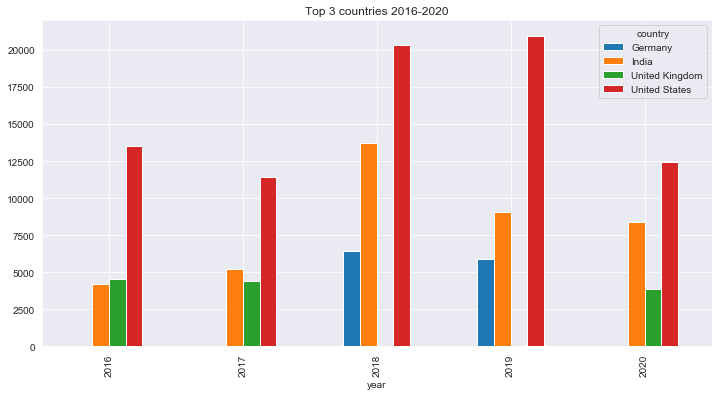

In [14]:
s = df_all['country'].groupby(df_all['year']).value_counts()
s.groupby(level=0).nlargest(3).reset_index(level=0, drop=True).unstack(1).plot.bar(figsize=(12,6))
plt.title("Top 3 countries 2016-2020");

In [17]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359621 entries, 0 to 359620
Data columns (total 6 columns):
coding_experience    340122 non-null object
country              358186 non-null object
job_satisfaction     265944 non-null object
programming_lg       308931 non-null object
salary               195790 non-null object
year                 359621 non-null object
dtypes: object(6)
memory usage: 16.5+ MB


In [19]:
df_all[df_all['country'] == 'Germany'].shape

(24241, 6)

In [22]:
df_all[df_all['country'] == 'Germany']['job_satisfaction'].isnull().sum()

6178

In [24]:
df_all[df_all['country'] == 'Germany']['job_satisfaction'].notnull().sum()

18063

In [32]:
df_all[df_all['country'] == 'Germany'].groupby(by='year').describe()['job_satisfaction']

,count,unique,top,freq
year,,,,
2016,2568,7,I'm somewhat satisfied with my job,1090
2017,3181,11,8,741
2018,4705,7,Moderately satisfied,1976
2019,4735,5,Slightly satisfied,1779
2020,2874,5,Very satisfied,981


In [33]:
df_all[df_all['country'] == 'United States'].groupby(by='year').describe()['job_satisfaction']

,count,unique,top,freq
year,,,,
2016,10457,7,I'm somewhat satisfied with my job,4168
2017,9322,11,8,2133
2018,15849,7,Moderately satisfied,6053
2019,17595,5,Very satisfied,7197
2020,9731,5,Very satisfied,4039


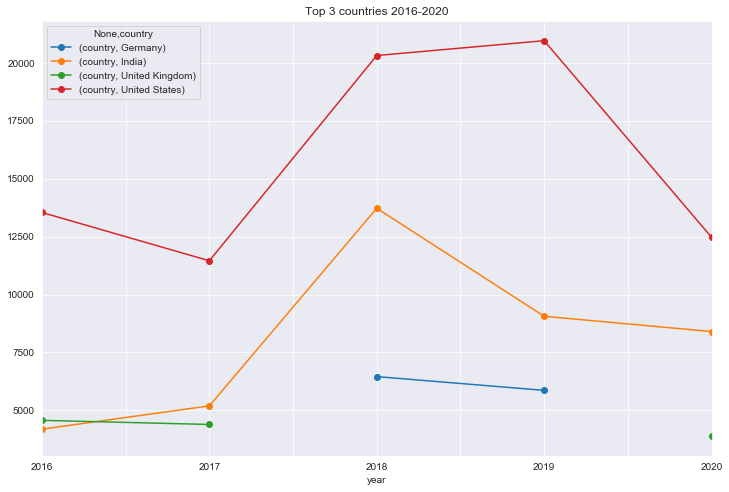

In [34]:
# let's check out a line plot
pd.DataFrame(s.groupby(level=0).nlargest(3).reset_index(level=0, 
                    drop=True)).unstack(1).plot.line(style='o-', figsize=(12,8));
plt.title("Top 3 countries 2016-2020");

## Conclusions

### Top 3 countries for software developper according to the raw, uncleaned dataset

Top 3 countries for 2016-2020 is relatively constant with U.S, India, U.K. and Germany. 
- For sure, we can definitely say the U.S. is the first throughout the years. 
- India is the second for 2017-2020 but in 2016 is number three and UK is on the second place. 
- For the third place is between UK and Germany for 2017-2020. 

### Export data for later

In [16]:
df_2016.to_csv(os.path.join(PATH_OUT, 'data_2016_raw.csv'), index=False)
df_2017.to_csv(os.path.join(PATH_OUT, 'data_2017_raw.csv'), index=False)
df_2018.to_csv(os.path.join(PATH_OUT, 'data_2018_raw.csv'), index=False)
df_2019.to_csv(os.path.join(PATH_OUT, 'data_2019_raw.csv'), index=False)
df_2020.to_csv(os.path.join(PATH_OUT, 'data_2020_raw.csv'), index=False)